# Аналитика данных с помощью pandas и matplotlib

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.

Минимальные баллы для зачёта по этой работе - 3 балла. Если вы не набираете тут 3 балла, то по всему курсу вы получаете неуд<br> (см. слайды с семинара №1)

 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация по matplotlib](https://matplotlib.org/index.html)

## 1. Данные (2 балла)

Начнем с необходимых приготовлений.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline
figsize = (16, 9)

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [2]:
coins = pd.read_csv('coins.csv')
coins = coins.set_index(pd.DatetimeIndex(coins['date']))
coins.index.rename('date_index', inplace=True)

Посмотрим что получилось

In [3]:
coins.head(10)

date   price  txCount      txVolume  activeAddresses symbol  \
date_index                                                                      
2013-04-28  2013-04-28  135.30  41702.0  6.879868e+07         117984.0    BTC   
2013-04-28  2013-04-28    4.30   9174.0  4.431952e+07          17216.0    LTC   
2013-04-29  2013-04-29  134.44  51602.0  1.138128e+08          86925.0    BTC   
2013-04-29  2013-04-29    4.37   9275.0  3.647810e+07          18395.0    LTC   
2013-04-30  2013-04-30  144.00  47450.0  8.426632e+07          76871.0    BTC   
2013-04-30  2013-04-30    4.40   9099.0  4.039166e+07          17810.0    LTC   
2013-05-01  2013-05-01  139.00  55176.0  1.206825e+08          83564.0    BTC   
2013-05-01  2013-05-01    4.29   8990.0  7.637420e+07          16991.0    LTC   
2013-05-02  2013-05-02  116.38  55295.0  9.337533e+07          81920.0    BTC   
2013-05-02  2013-05-02    3.78   8031.0  1.163151e+07          15769.0    LTC   

                name    open    high     low   close  volume        market  
date_index                                                                  
2013-04-28   Bitcoin  135.30  135.98  132.10  134.21     0.0  1.500520e+09  
2013-04-28  Litecoin    4.30    4.40    4.18    4.35     0.0  7.377340e+07  
2013-04-29   Bitcoin  134.44  147.49  134.00  144.54     0.0  1.491160e+09  
2013-04-29  Litecoin    4.37    4.57    4.23    4.38     0.0  7.495270e+07  
2013-04-30   Bitcoin  144.00  146.93  134.05  139.00     0.0  1.597780e+09  
2013-04-30  Litecoin    4.40    4.57    4.17    4.30     0.0  7.572680e+07  
2013-05-01   Bitcoin  139.00  139.89  107.72  116.99     0.0  1.542820e+09  
2013-05-01  Litecoin    4.29    4.36    3.52    3.80     0.0  7.390120e+07  
2013-05-02   Bitcoin  116.38  125.60   92.28  105.21     0.0  1.292190e+09  
2013-05-02  Litecoin    3.78    4.04    3.01    3.37     0.0  6.524270e+07

Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [4]:
coins['name'].nunique()

70

#### 2. За какой период данные мы имеем? (0.4 балла)

In [5]:
a = pd.to_datetime(coins['date'].max(), format='%Y-%m-%d')
b = pd.to_datetime(coins['date'].min(), format='%Y-%m-%d')
print(a - b)

1865 days 00:00:00


#### 3. Есть ли пропуски в данных? Какой природы эти пропуски? (0.5 балла)

In [6]:
for column in coins:
    if pd.isnull(coins[column]).any():
        print(f'Column {column} has null')

Column price has null
Column txCount has null
Column txVolume has null
Column activeAddresses has null


#### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [7]:
coins[coins.price == coins.price.max()][['name', 'price']]

name    price
date_index                  
2017-12-17  Bitcoin  19475.8

#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

Min: KingN Coin
Max: Bitcoin


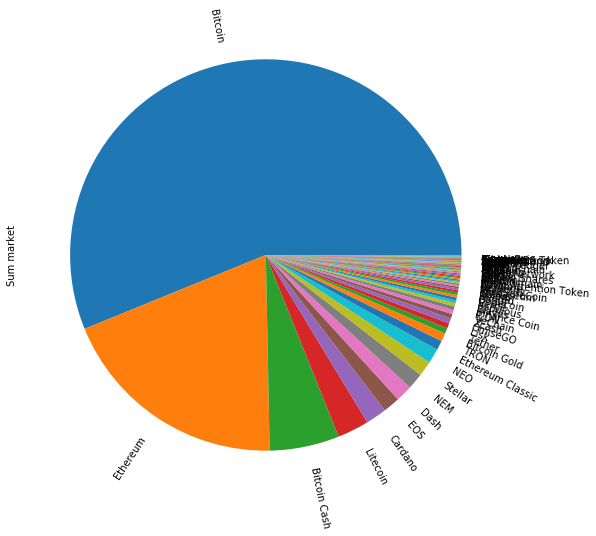

In [8]:
stats = coins[['name', 'market']].groupby('name').aggregate('sum').rename(columns={'market': 'Sum market'})['Sum market'].sort_values(ascending=False)
print(f'Min: {stats.idxmin()}')
print(f'Max: {stats.idxmax()}')

stats.plot.pie(figsize=figsize, rotatelabels=True)

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [9]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [36]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    coin = coins[coins.symbol == symbol].loc[start_date:end_date]

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    
    plt.xticks(pd.date_range(start=start_date, end=end_date,periods=300))
    ax.set_title(f'OHCL for {symbol}')
    for label in ['open', 'high', 'low', 'close']:
        ax.plot(coin[label], label=label)    
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    
    ax.set_xticklabels([i.date() for i in pd.date_range(start=start_date, end=end_date,periods=300).to_pydatetime()], rotation='80')
    
    # Для основных делений оси x мы строим координатную сетку пунктирной линией
    ax.grid(True, axis='x', which='major', color='dimgrey', linestyle='--')
    # Для вспомогательных делений оси x мы строим координатную сетку сплошной линией более тусклого цвета
    ax.grid(True, axis='x', which='minor', color='lightgrey', linestyle=':')
    # Аналогично настраиваются параметры для координатной сетки по оси Y
    ax.grid(True, axis='y', which='major', color='grey', linestyle='-.')
    ax.grid(True, axis='y', which='minor', color='lightgrey', linestyle='-')
    

Посмотрим, что получилось:

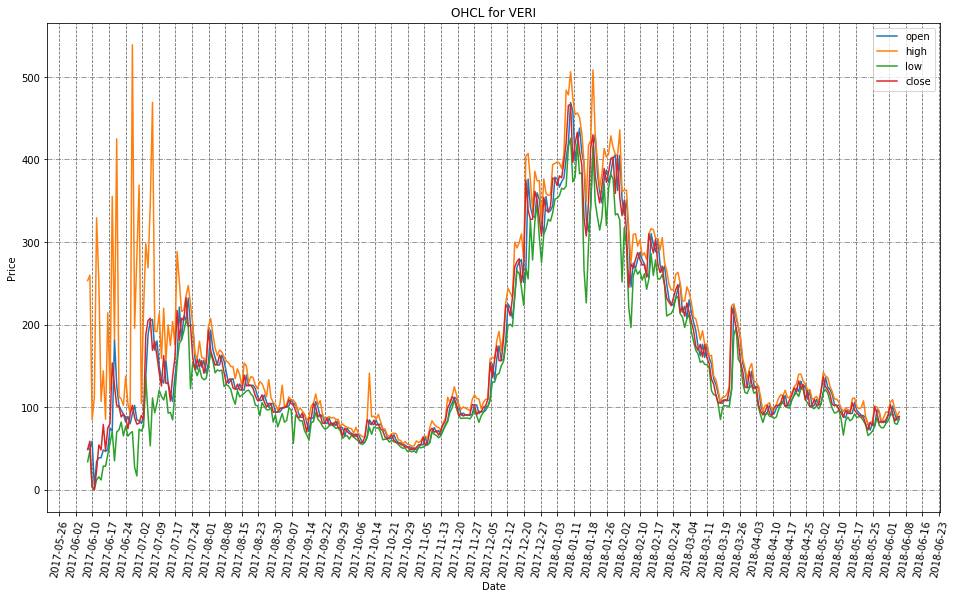

In [37]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [12]:
import random
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    pnd = coins.loc[coins['symbol'] == symbol][start_date:end_date].apply(lambda x: x.high/max(x.open, x.close), axis=1)
    return pnd.idxmax(), pnd.max(), pnd

2017-11-29 00:00:00 1.1428940004366206


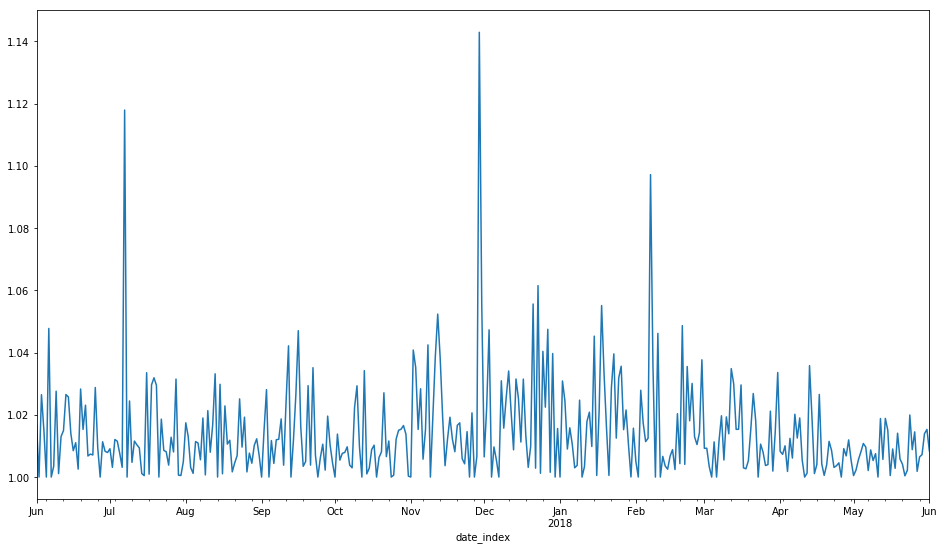

In [13]:
idx, val, pnd = find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')
print(idx, val)
pnd.plot(figsize=figsize)

#### Сравните эти значения для разных монет.

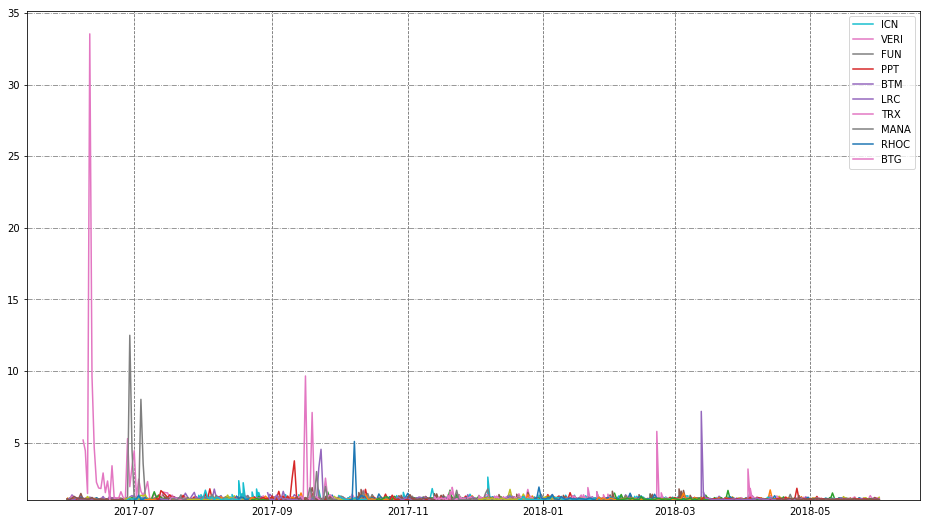

In [14]:
plt.figure(figsize=figsize)

for i, symbol in enumerate(coins.symbol.unique()):
    _, val, pnd = find_most_severe_pump_and_dump(coins, symbol=symbol, start_date='2017-06-01', end_date='2018-06-01')    
    plt.plot(pnd, label=(symbol if val > 2 else None))
    ax = plt.gca()
    # Для основных делений оси x мы строим координатную сетку пунктирной линией
    ax.grid(True, axis='x', which='major', color='dimgrey', linestyle='--')
    # Для вспомогательных делений оси x мы строим координатную сетку сплошной линией более тусклого цвета
    ax.grid(True, axis='x', which='minor', color='lightgrey', linestyle=':')
    # Аналогично настраиваются параметры для координатной сетки по оси Y
    ax.grid(True, axis='y', which='major', color='grey', linestyle='-.')
    ax.grid(True, axis='y', which='minor', color='lightgrey', linestyle='-')
    ax.set_ylim(bottom=1, auto=True)
plt.legend()

## 4. Окупаемость инвестиций (1 балл)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [15]:
def compute_roi(coins, investments, start_date, end_date):
    coins_start = coins[['price', 'symbol']][coins.symbol.isin(investments) & (coins.date == start_date)]
    coins_end = coins[['price', 'symbol']][coins.symbol.isin(investments) & (coins.date == end_date)]
    
    start = 0
    end = 0
    for investment in investments:
        start += float(coins_start[coins_start.symbol == investment]['price']) * investments[investment]
        end += float(coins_end[coins_end.symbol == investment]['price']) * investments[investment]
    result = (end - start) / start
    return result

In [16]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

0.004831614576721986

In [17]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

57.53575236064575

## 5. Технический анализ (1 балл)

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

#### Нарисуйте график цены, скользящее среднее и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N (window) = 21, K (width) = 2.

Границы считаются очень просто: (MA + Kσ) и (MA - Kσ), где MA - скользящее среднее за N дней, а σ - скользящее стандартное отклонение за N дней.

Тут вам поможет функция rolling для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [18]:
def plot_bollinger_bands(coins, symbol, window, width):
    coin = coins['price'][coins.symbol == symbol]
    mean = coin.rolling(window).mean()
    std = coin.rolling(window).std()
    
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    
    coin.plot()
    mean.plot(label='mean')

    ax.fill_between(
        coin.index, mean - width * std, mean + width * std,
        alpha=0.5,
        color='lightgrey',
        label='Bollinger Bands'
    )
    ax.legend(loc='best')
    
    # Для основных делений оси x мы строим координатную сетку пунктирной линией
    ax.grid(True, axis='x', which='major', color='dimgrey', linestyle='--')
    # Для вспомогательных делений оси x мы строим координатную сетку сплошной линией более тусклого цвета
    ax.grid(True, axis='x', which='minor', color='lightgrey', linestyle=':')
    # Аналогично настраиваются параметры для координатной сетки по оси Y
    ax.grid(True, axis='y', which='major', color='grey', linestyle='-.')
    ax.grid(True, axis='y', which='minor', color='lightgrey', linestyle='-')
    
    ax.set_ylim(bottom=0, auto=True)    

    plt.title(symbol + ' analysis')
    plt.xlabel('Time')
    plt.ylabel('Price')


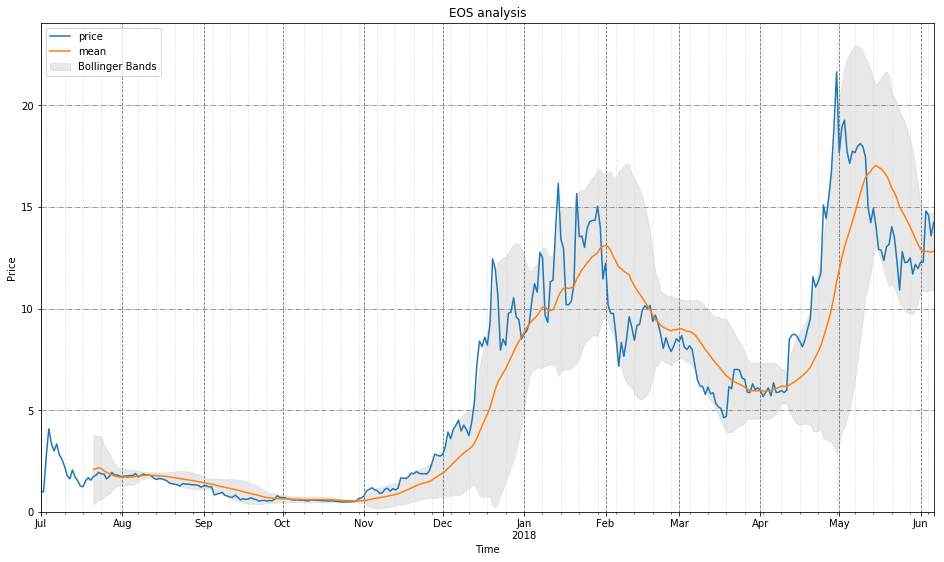

In [19]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

#### Сделайте вывод о том, выполнялось ли правило Боллинджера.

Да, выполняется.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на капитализацию. Давайте поймём почему.

#### Нарисуйте еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. При этом используйте данные начиная с 2017-07-01.

In [20]:
def plot_coins_capitalizations(coins, symbols, start_date):
    fig = plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    for symbol in symbols:
        cumsum = coins[coins.symbol == symbol].market.plot()
        
    ax = plt.gca()
    # Для основных делений оси x мы строим координатную сетку пунктирной линией
    ax.grid(True, axis='x', which='major', color='dimgrey', linestyle='--')
    # Для вспомогательных делений оси x мы строим координатную сетку сплошной линией более тусклого цвета
    ax.grid(True, axis='x', which='minor', color='lightgrey', linestyle=':')
    # Аналогично настраиваются параметры для координатной сетки по оси Y
    ax.grid(True, axis='y', which='major', color='grey', linestyle='-.')
    ax.grid(True, axis='y', which='minor', color='lightgrey', linestyle='-')
    
    
    plt.subplot(1, 2, 2)
    cumsum = coins.groupby('date').sum().market.plot()
    
    ax = plt.gca()
    # Для основных делений оси x мы строим координатную сетку пунктирной линией
    ax.grid(True, axis='x', which='major', color='dimgrey', linestyle='--')
    # Для вспомогательных делений оси x мы строим координатную сетку сплошной линией более тусклого цвета
    ax.grid(True, axis='x', which='minor', color='lightgrey', linestyle=':')
    # Аналогично настраиваются параметры для координатной сетки по оси Y
    ax.grid(True, axis='y', which='major', color='grey', linestyle='-.')
    ax.grid(True, axis='y', which='minor', color='lightgrey', linestyle='-')
    
    ax.set_ylim(bottom=0, auto=True)   

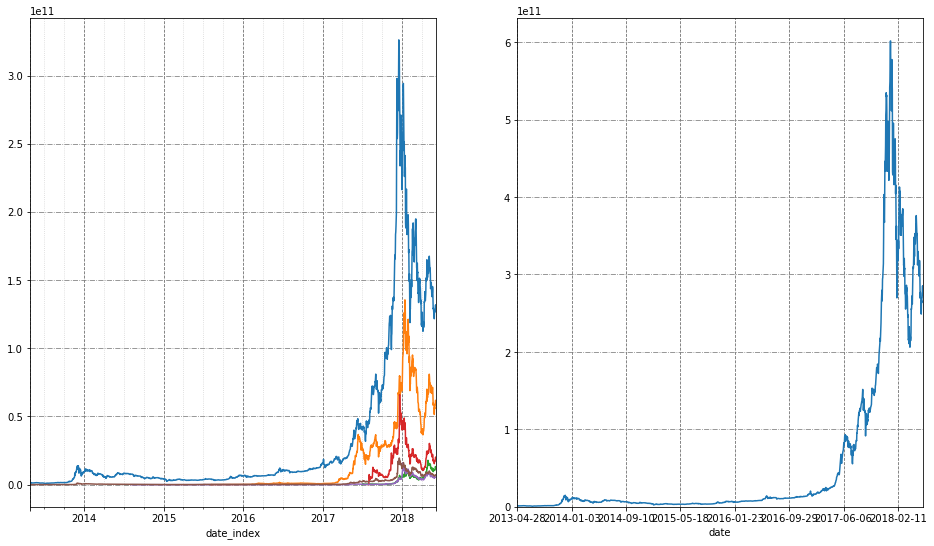

In [21]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

#### Проанализируйте зависимость доли капитализации альткойнов от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

In [22]:
coins.name.unique()

array(['Bitcoin', 'Litecoin', 'Dogecoin', 'Vertcoin', 'DigiByte', 'Dash',
       'MaidSafeCoin', 'Stellar', 'Verge', 'Tether', 'NEM', 'Ethereum',
       'Augur', 'Decred', 'PIVX', 'Lisk', 'Waves', 'Ethereum Classic',
       'NEO', 'Iconomi', 'Zcash', 'Golem', 'Gnosis', 'Aragon',
       'Aeternity', 'Basic Attention Token', 'Veritaseum', 'FunFair',
       'TenX', 'Status', 'EOS', 'Gas', 'Metal', 'Populous', 'Bitmark',
       'OmiseGO', 'Civic', 'Ethos', 'iCoin', 'Binance Coin',
       'Bitcoin Cash', 'Bytom', '0x', 'VeChain', 'Nebulas', 'Waltonchain',
       'Loopring', 'KingN Coin', 'TRON', 'Decentraland', 'Kyber Network',
       'SALT', 'Cardano', 'RChain', 'Enigma', 'Aion', 'KuCoin Shares',
       'ICON', 'Power Ledger', 'Bitcoin Gold', 'Bitgem', 'QASH',
       'Dragonchain', 'aelf', 'SIRIN LABS Token', 'Zilliqa', 'Polymath',
       'Centrality', 'Loom Network', 'Cortex'], dtype=object)

В датасете нет альткоинов.

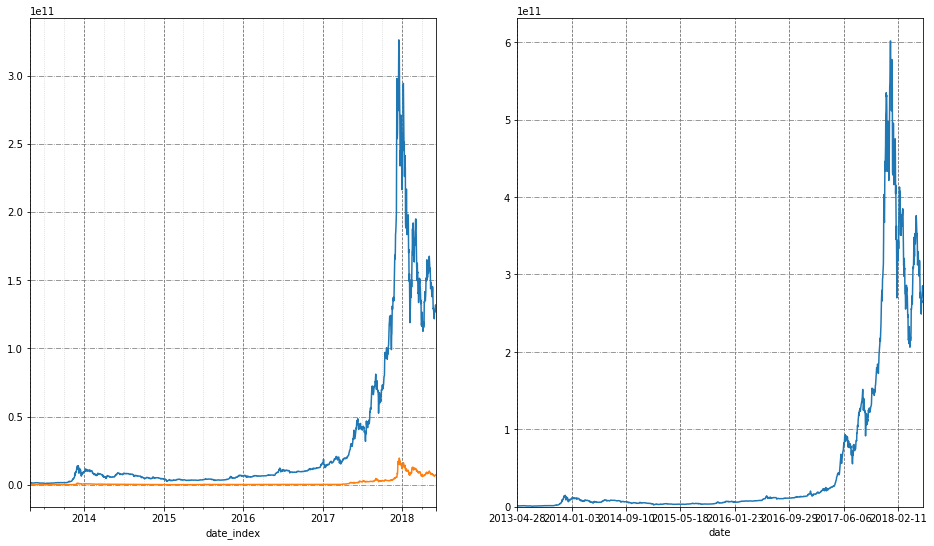

In [23]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'LTC'),
    start_date='2017-07-01'
)

## 7. Корреляции монет (1 балл)

#### Теперь нужно подробнее посмотреть на корреляции средних капитализаций монет. При этом будем смотреть на среднее сглаженное за последние window дней до дня date с коэффициентом сглаживания alpha для набора монет symbols.  
#### Реализуйте функцию, которая будет возвращать квадратный DataFrame с числом строк и столбцов равным числу рассматриваемых монет и со значениями корреляций.

In [24]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    date = pd.to_datetime(date)
    coins = coins[date - pd.DateOffset(window):date]
    df = pd.DataFrame({s: [0 for i in range(len(symbols))] for s in symbols})
    df.index = pd.Series(symbols)
    for i, symbol_i in enumerate(symbols):
        for j, symbol_j in enumerate(symbols):
            ewmed_price_for_i = coins[coins.symbol == symbols[i]]['market'].ewm(alpha=alpha).mean()
            ewmed_price_for_j = coins[coins.symbol == symbols[j]]['market'].ewm(alpha=alpha).mean()
            df.loc[symbol_i, symbol_j] = ewmed_price_for_i.corr(ewmed_price_for_j)
    return df

In [25]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [26]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия основанная на скользящих средних. Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае. Посмотрим на пример

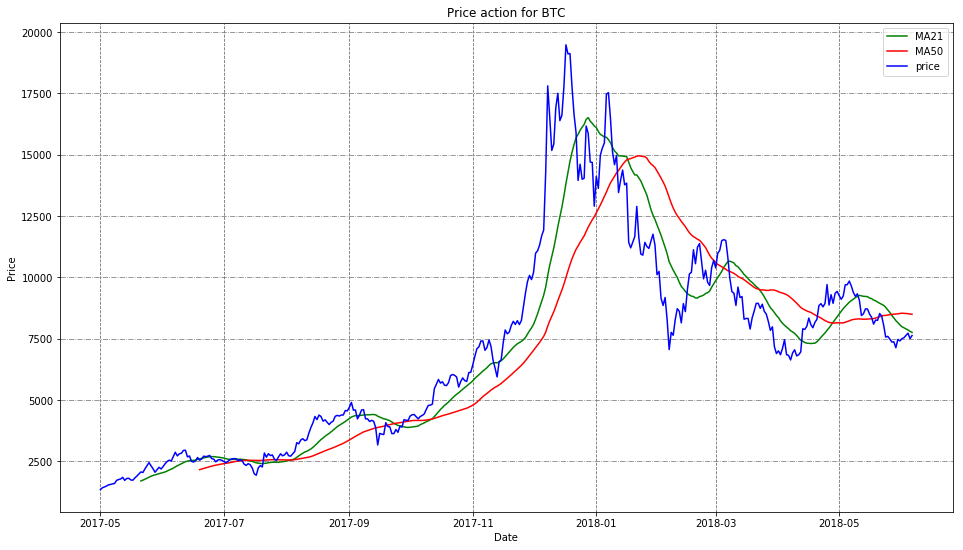

In [27]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    #fig = plt.figure(figsize=(16, 6))
    #ax = fig.add_subplot(111)
    ax = plt.gca()
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    
    ax = plt.gca()
    # Для основных делений оси x мы строим координатную сетку пунктирной линией
    ax.grid(True, axis='x', which='major', color='dimgrey', linestyle='--')
    # Для вспомогательных делений оси x мы строим координатную сетку сплошной линией более тусклого цвета
    ax.grid(True, axis='x', which='minor', color='lightgrey', linestyle=':')
    # Аналогично настраиваются параметры для координатной сетки по оси Y
    ax.grid(True, axis='y', which='major', color='grey', linestyle='-.')
    ax.grid(True, axis='y', which='minor', color='lightgrey', linestyle='-')
    
    plt.show() 

plt.figure(figsize=figsize)
plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что для скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.
#### Реализуйте функцию, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании 

#### Notes:
Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод shift(1) у Series.
Отношение цен закрытия за сегодня и за вчера - это мой multiplier за сегодняшний день. При этом давайте строить графики накопления для multipliers. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй- 0.5 и в третий 2. То график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).

При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый threshold (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [28]:
previous_multiplier = 1

def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    global previous_multiplier
    previous_multiplier = 1
    start_date = pd.to_datetime(start_date)    
    end_date = pd.to_datetime(end_date)

    coins = coins[start_date:end_date]
    
    # Regular investing
    plt.figure(figsize=(16, 5))   
    plt.subplot(1, 2, 1)
    coin = coins[coins.symbol == symbol][start_date:end_date]
    coin['close_shifted'] = coin.close.shift(1)
    coin['multiplier_raw'] = coin.close / coin.close_shifted
    coin['multiplier'] = coin.multiplier_raw.cumprod()
    coin.multiplier.plot(label='regular investing')
    
    
    # Our stratagy
    def stratagy(row):
        global previous_multiplier
        if (row.lead - row.lag) / row.price > threshold:
            previous_multiplier *= row['multiplier_raw']
        return previous_multiplier
            
    coin['lag'] = coin['price'].rolling(lag_window, center=False).mean()
    coin['lead'] = coin['price'].rolling(lead_window, center=False).mean()
    coin['multiplier_stratagy'] = coin.apply(stratagy, axis=1)
    coin.multiplier_stratagy.plot(label='stratagy')
    
    # Plot properties
    plt.legend()
    
    ax = plt.gca()
    # Для основных делений оси x мы строим координатную сетку пунктирной линией
    ax.grid(True, axis='x', which='major', color='dimgrey', linestyle='--')
    # Для вспомогательных делений оси x мы строим координатную сетку сплошной линией более тусклого цвета
    ax.grid(True, axis='x', which='minor', color='lightgrey', linestyle=':')
    # Аналогично настраиваются параметры для координатной сетки по оси Y
    ax.grid(True, axis='y', which='major', color='grey', linestyle='-.')
    ax.grid(True, axis='y', which='minor', color='lightgrey', linestyle='-')
    
    
    # Second subplot
    plt.subplot(1, 2, 2)
    plot_moving_averages(coins, symbol, lead_window, lag_window, start_date, end_date)
    


In [29]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

#### Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели.

Без неожиданных скачков зарабатываем столько же если бы не трогали вовсе.

## 9. Отказ от ответственности 
Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.

![Disclamer](https://i0.kym-cdn.com/entries/icons/mobile/000/024/785/Screen_Shot_2017-11-30_at_1.12.37_PM.jpg)